In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, roc_curve

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Data loading for project
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FILES/CreditPrediction.csv')

# 1. Data Exploration and Analysis
print(df.describe())
print(df.info())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.016700e+04  10167.000000     10167.000000     9944.000000   
mean   7.391864e+08     46.753817         2.346513       35.913415   
std    3.690366e+07     13.520505         1.298701        7.980102   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130407e+08     41.000000         1.000000       31.000000   
50%    7.179400e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08    352.330517         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10147.000000            10167.000000   
mean                   3.813245                2.341595   
std                    1.554741                1.010502   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

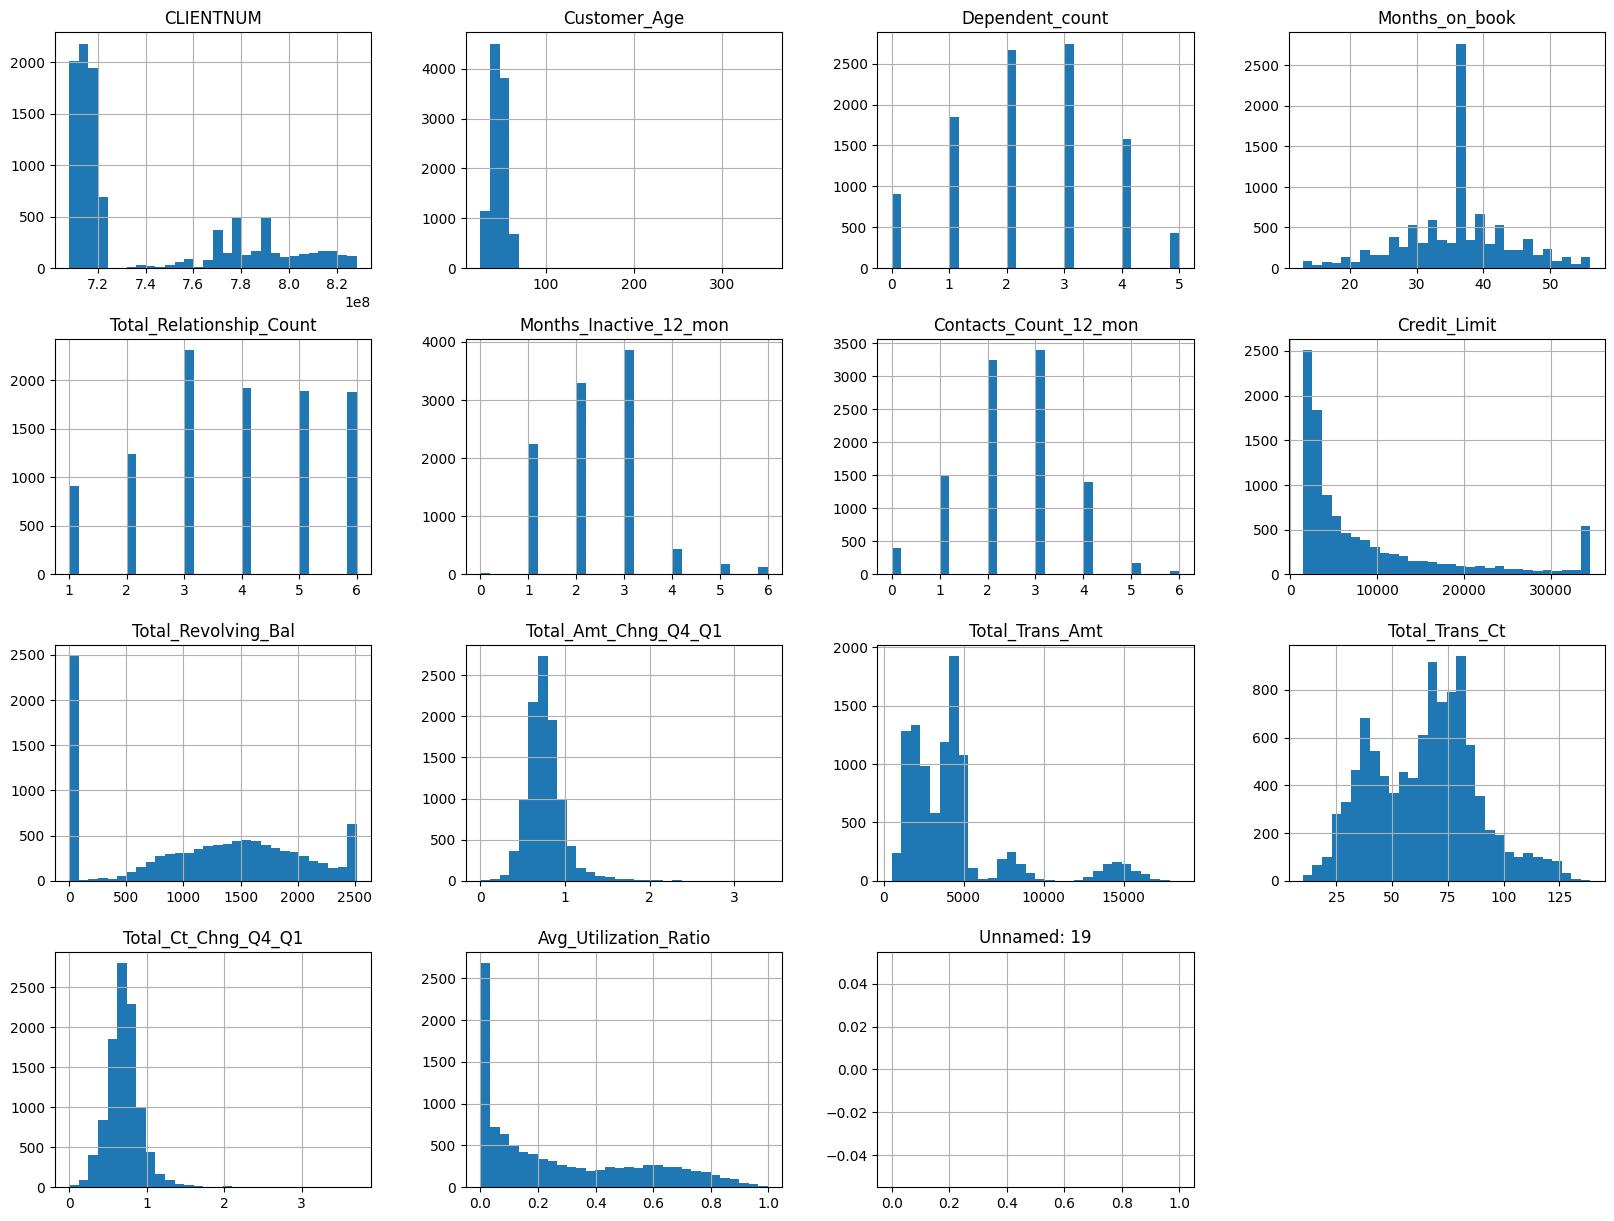

In [15]:
# Visualizing the distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

In [16]:
# Check for missing values
print(df.isnull().sum())


CLIENTNUM                       0
Customer_Age                    0
Gender                        199
Dependent_count                 0
Education_Level                 0
Marital_Status               1950
Income_Category                 0
Card_Category                1924
Months_on_book                223
Total_Relationship_Count       20
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 19                 10167
dtype: int64


In [23]:
# 2. Data Cleaning
# Impute missing values for numerical columns
imputer = SimpleImputer(strategy='median')
df['Months_on_book'] = imputer.fit_transform(df[['Months_on_book']])

# Check if 'Unnamed: 19' exists before dropping
if 'Unnamed: 19' in df.columns:
    df.drop('Unnamed: 19', axis=1, inplace=True)

# Impute missing categorical data
# Fill with the most frequent value (mode)
for column in ['Gender', 'Marital_Status', 'Card_Category']:
    if column in df.columns:  # Ensure the column exists
        # Calculate the mode for the current column
        mode_value = df[column].mode()[0]

        # Fill missing values in the column
        df[column] = df[column].fillna(mode_value)

In [24]:
# Now drop rows with missing values after imputation
df = df.dropna()

In [25]:
# 3. Feature Engineering
# Assuming 'Credit_Limit' as the target variable for prediction
X = df.drop('Credit_Limit', axis=1)
y = df['Credit_Limit']
y = pd.cut(y, bins=[0, 5000, 15000, np.inf], labels=['low', 'medium', 'high'])


In [26]:
# Encoding categorical variables
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [27]:
# 4. Model Selection and Implementation
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with preprocessing and modeling
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [28]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CLIENTNUM', 'Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('classifier', RandomForestClassifier())])

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # import the module
# Encoding categorical variables
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Assuming X and y are your features and target variable respectively
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Create a pipeline that includes the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Make predictions using predict_proba to get probabilities
y_pred_log_reg_proba = model.predict_proba(X_test)

y_pred_log_reg = model.predict(X_test) # Added this line to define y_pred_log_reg

# Evaluate the model using predicted probabilities
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# AUC-ROC score using probabilities for class 1 (assuming binary classification)
# Set multi_class parameter to 'ovr' to handle multi-class classification
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg_proba, multi_class='ovr')
print(f'AUC-ROC: {roc_auc_log_reg}')

Logistic Regression Results:
[[ 315   24   25]
 [  14 1025   20]
 [  37  104  466]]
              precision    recall  f1-score   support

        high       0.86      0.87      0.86       364
         low       0.89      0.97      0.93      1059
      medium       0.91      0.77      0.83       607

    accuracy                           0.89      2030
   macro avg       0.89      0.87      0.87      2030
weighted avg       0.89      0.89      0.89      2030

AUC-ROC: 0.980369272485127


In [30]:
# Encoding categorical variables
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that includes the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Make predictions using predict_proba to get probabilities
y_pred_rf_proba = model.predict_proba(X_test)
y_pred_rf = model.predict(X_test) # Added this line to define y_pred_rf

# Evaluate the model using predicted probabilities
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# AUC-ROC score using probabilities
# Set multi_class parameter to 'ovr' to handle multi-class classification
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba, multi_class='ovr')
print(f'AUC-ROC: {roc_auc_rf}')

Random Forest Results:
[[301  16  47]
 [ 13 966  80]
 [ 46 104 457]]
              precision    recall  f1-score   support

        high       0.84      0.83      0.83       364
         low       0.89      0.91      0.90      1059
      medium       0.78      0.75      0.77       607

    accuracy                           0.85      2030
   macro avg       0.84      0.83      0.83      2030
weighted avg       0.85      0.85      0.85      2030

AUC-ROC: 0.9633118282647297


In [31]:
# Print AUC-ROC for both models
print(f"Logistic Regression AUC-ROC: {roc_auc_log_reg}")
print(f"Random Forest AUC-ROC: {roc_auc_rf}")

# If you want to compare accuracy as well:
from sklearn.metrics import accuracy_score

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Random Forest Accuracy: {accuracy_rf}")


Logistic Regression AUC-ROC: 0.980369272485127
Random Forest AUC-ROC: 0.9633118282647297
Logistic Regression Accuracy: 0.8896551724137931
Random Forest Accuracy: 0.8492610837438423


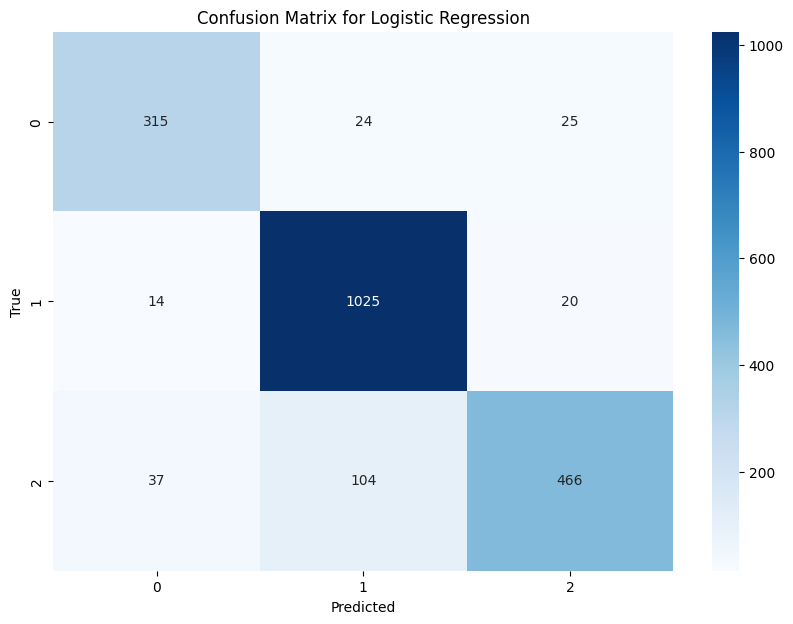

In [32]:
cm = confusion_matrix(y_test, y_pred_log_reg)  # Change y_pred_log_reg to your specific model predictions

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

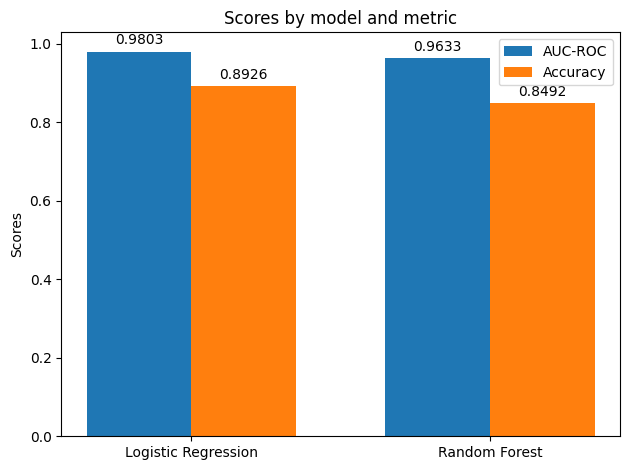

In [33]:
# Comparative Analysis
models = ['Logistic Regression', 'Random Forest']
auc_roc_scores = [0.9803, 0.9633]  # Replace with your actual AUC-ROC scores
accuracy_scores = [0.8926, 0.8492]  # Replace with your actual accuracy scores

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, auc_roc_scores, width, label='AUC-ROC')
rects2 = ax.bar(x + width/2, accuracy_scores, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

                                Feature  Importance
12           num__Avg_Utilization_Ratio    0.311213
7              num__Total_Revolving_Bal    0.095484
9                  num__Total_Trans_Amt    0.052408
30  cat__Income_Category_Less than $40K    0.040191
10                  num__Total_Trans_Ct    0.039876
8             num__Total_Amt_Chng_Q4_Q1    0.039270
11             num__Total_Ct_Chng_Q4_Q1    0.038425
0                        num__CLIENTNUM    0.037692
14                        cat__Gender_M    0.032745
32              cat__Card_Category_Blue    0.032419
1                     num__Customer_Age    0.030012
3                   num__Months_on_book    0.028760
13                        cat__Gender_F    0.024043
35            cat__Card_Category_Silver    0.021237
4         num__Total_Relationship_Count    0.018602
2                  num__Dependent_count    0.018233
6            num__Contacts_Count_12_mon    0.017559
27     cat__Income_Category_$40K - $60K    0.016494
5           

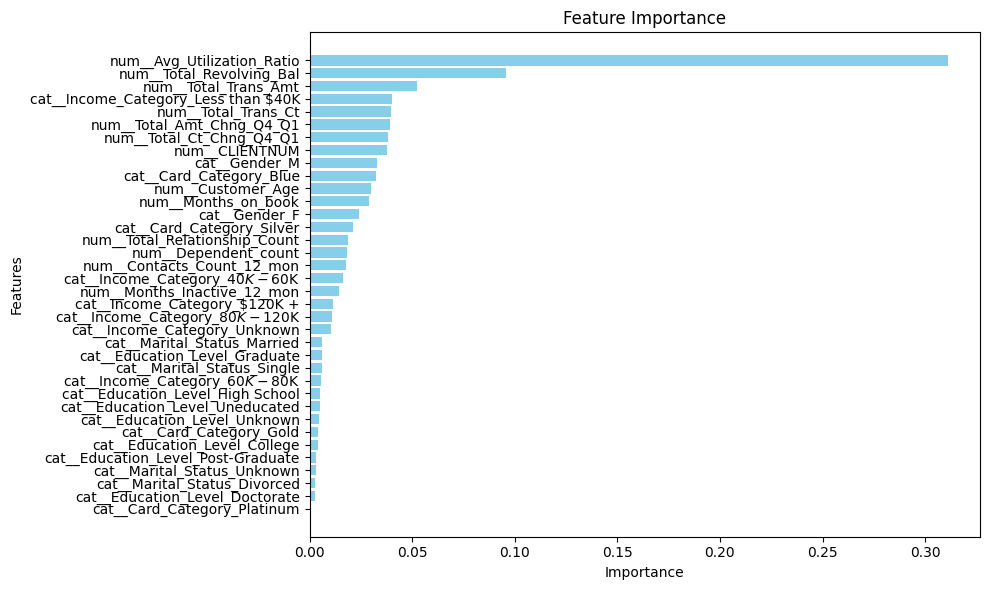

In [38]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create a pipeline that includes the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Use the preprocessor defined earlier
    ('classifier', rf_model)
])

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Get feature importance from the 'classifier' step of the pipeline
feature_importances = model.named_steps['classifier'].feature_importances_

# Get feature names after preprocessing
# This is the key change to get the correct feature names
feature_names = model[:-1].get_feature_names_out()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use the transformed feature names
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
